# Fake Providers

Fake providers are pretend quantum computers in Qiskit. They copy the behavior and noise of real IBM devices so you can test your circuits without using the real hardware.


[IBM Fake Providers](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider)


### \* *Example:*

#### **Bell states**

Prepare and measure the Bell state $|\psi_-\rangle$. Run an ideal and a noisy simulation of the circuit (in the latter case, use a different fake backend). Plot the results of both simulations in histograms.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Operator, Statevector
from qiskit_ibm_runtime.fake_provider import FakeCasablancaV2
device_backend = FakeCasablancaV2() # A fake 7 qubit backend.
from random import randint

\* If you do not have the IBM fake provider installed : *pip install qiskit-ibm-runtime*

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


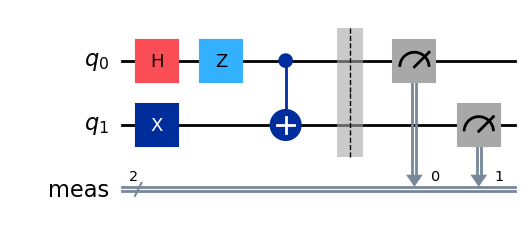

In [2]:
qc = QuantumCircuit(2) # Create a quantum circuit with 2 qubits
qc.h(0) # Apply Hadamard gate to the first qubit
qc.z(0) # Apply Z gate to the first qubit
qc.x(1) # Apply X gate to the second qubit   
qc.cx(0, 1) # Apply CNOT gate with qubit 0 as control and qubit 1 as target
print(Statevector(qc))

qc.measure_all()
qc.draw('mpl')

##### **Ideal Simulation**

In [3]:
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(qc, shots = 512).result()
counts_ideal = result_ideal.get_counts(0)

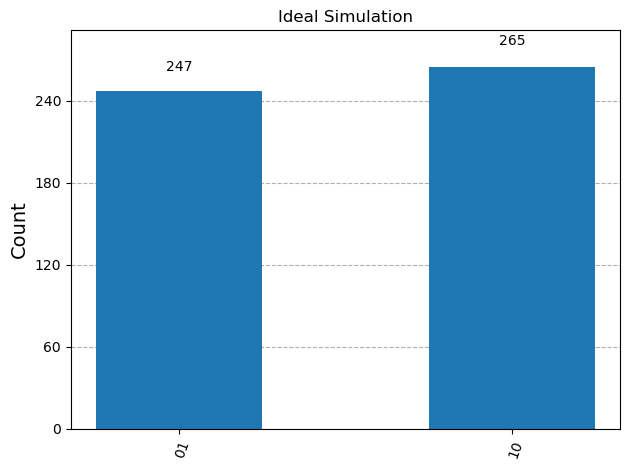

In [4]:
plot_histogram(counts_ideal, title = 'Ideal Simulation')

##### **Noisy Simulation**

In [5]:
sim_noise = AerSimulator.from_backend(device_backend)

Why transpile?

- Each backend (real or fake) has its own “native” gate set — the small set of quantum operations it can actually perform.

- Qubit connectivity is limited — some qubits can’t directly interact.

- Gate performance varies — the transpiler can choose gate implementations and orderings that minimize errors for that specific backend.

Without transpilation, your circuit might contain operations or qubit connections the backend doesn’t actually have, and the run would fail.

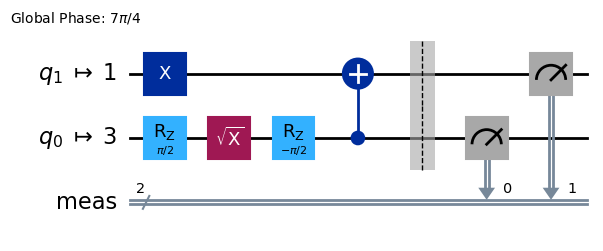

In [6]:
tqc = transpile(qc, sim_noise)
tqc.draw('mpl')

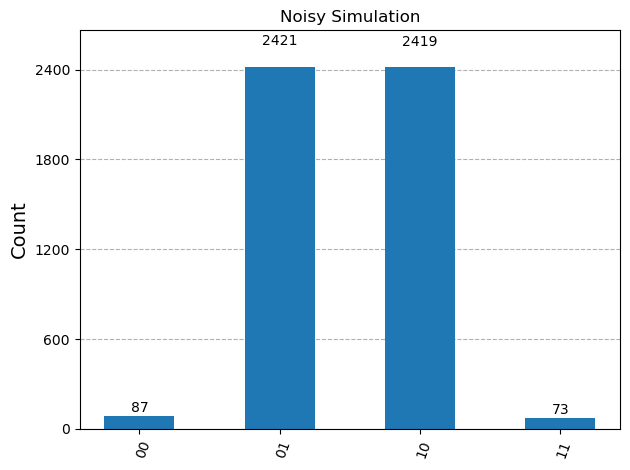

In [7]:
result_noise = sim_noise.run(tqc, shots = 5000).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title = 'Noisy Simulation')